1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

In [21]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Построим ряд первых разностей

In [22]:
brent_data['d_brent_data'] = brent_data['Значение'].diff()

In [24]:
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_brent_data
Дата,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,NaN
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,-0.32
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.05
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,0.01


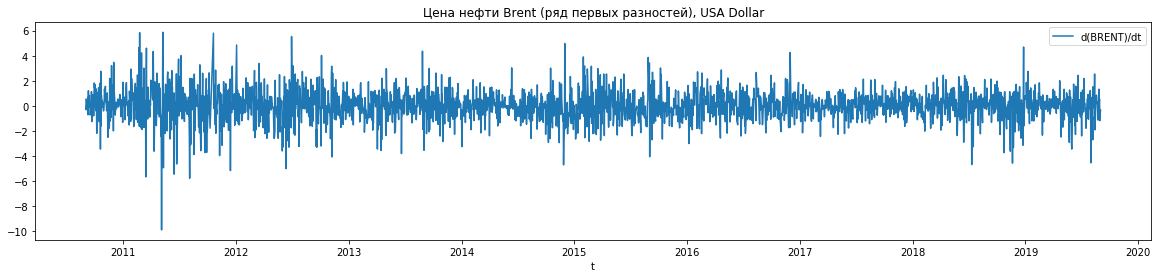

In [23]:
plt.figure(figsize=(20,4))
plt.plot(brent_data.index,brent_data['d_brent_data'], label='d(BRENT)/dt')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent (ряд первых разностей), USA Dollar')
plt.show()

2. Добавьте первые разности по стоимости доллара и евро к рублю (можно добавить и сами курсы валют - прошлые значения)

In [17]:
rub_doll=pd.read_excel('RC_F01_09_2010_T18_07_2020.xlsx')
rub_doll.rename(columns={'curs':'curs dollar'},inplace=True)
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs dollar
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [16]:
rub_e=pd.read_excel('RC_F01_09_2010_T18_07_2020_евро.xlsx')
rub_e.rename(columns={'curs':'curs euro'},inplace=True)
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.head()

,curs euro
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


Объединим данные по дате

In [25]:
brent_data = pd.concat([brent_data, rub_doll, rub_e], axis=1)
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_brent_data,curs dollar,curs euro
2010-09-01,76.37,2010.0,9.0,1.0,3.0,244.0,35.0,2.0,0.0,0.0,0.0,NaN,30.8669,39.0127
2010-09-02,76.89,2010.0,9.0,2.0,3.0,245.0,35.0,3.0,0.0,0.0,0.0,0.52,30.8001,39.1654
2010-09-03,76.57,2010.0,9.0,3.0,3.0,246.0,35.0,4.0,0.0,0.0,0.0,-0.32,30.6858,39.2901
2010-09-04,76.62,2010.0,9.0,4.0,3.0,247.0,35.0,5.0,0.0,0.0,0.0,0.05,30.6922,39.3505
2010-09-05,76.63,2010.0,9.0,5.0,3.0,248.0,35.0,6.0,0.0,1.0,0.0,0.01,NaN,NaN


Посмотрим на первые разности для кросс-курсов

In [28]:
brent_data['d_rub_doll'] = brent_data['curs dollar'].diff()
brent_data['d_rub_e'] = brent_data['curs euro'].diff()
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_brent_data,curs dollar,curs euro,d_rub_doll,d_rub_e
2010-09-01,76.37,2010.0,9.0,1.0,3.0,244.0,35.0,2.0,0.0,0.0,0.0,NaN,30.8669,39.0127,NaN,NaN
2010-09-02,76.89,2010.0,9.0,2.0,3.0,245.0,35.0,3.0,0.0,0.0,0.0,0.52,30.8001,39.1654,-0.0668,0.1527
2010-09-03,76.57,2010.0,9.0,3.0,3.0,246.0,35.0,4.0,0.0,0.0,0.0,-0.32,30.6858,39.2901,-0.1143,0.1247
2010-09-04,76.62,2010.0,9.0,4.0,3.0,247.0,35.0,5.0,0.0,0.0,0.0,0.05,30.6922,39.3505,0.0064,0.0604
2010-09-05,76.63,2010.0,9.0,5.0,3.0,248.0,35.0,6.0,0.0,1.0,0.0,0.01,NaN,NaN,NaN,NaN


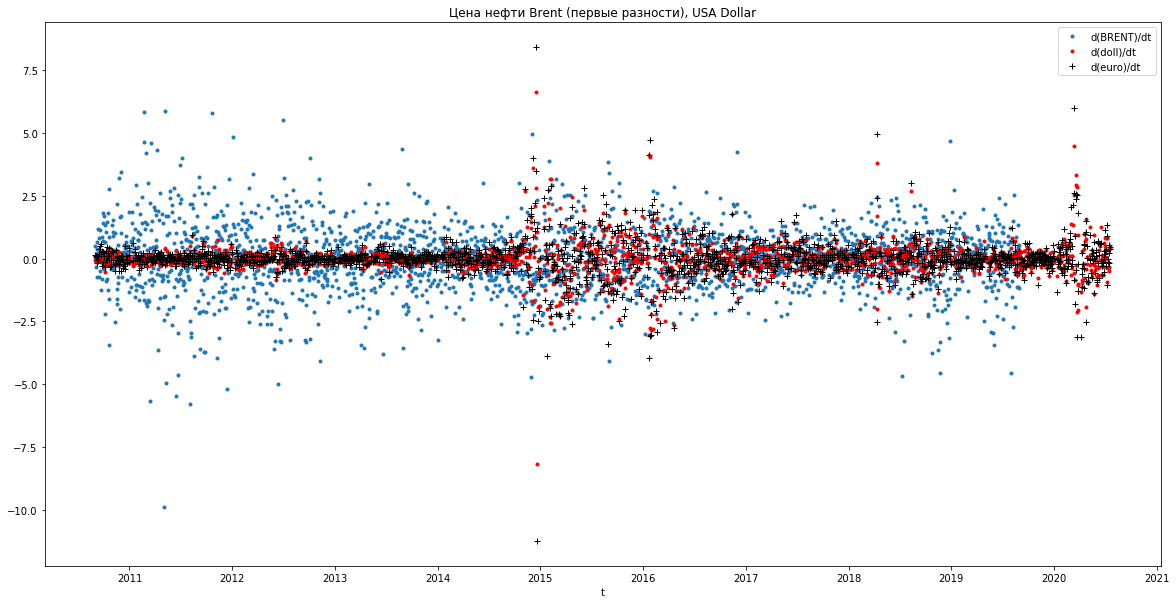

In [29]:
plt.figure(figsize=(20,10))
plt.plot(brent_data.index,brent_data['d_brent_data'],'.', label='d(BRENT)/dt')
plt.plot(brent_data.index,brent_data['d_rub_doll'],'.r', label='d(doll)/dt')
plt.plot(brent_data.index,brent_data['d_rub_e'],'+k', label='d(euro)/dt')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent (первые разности), USA Dollar')
plt.show()

3. Сделайте ее перрасчет (ресемплинг) в представление по неделям.

In [30]:
brent_data_w = brent_data.resample('W').mean()
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,d_brent_data,curs dollar,curs euro,d_rub_doll,d_rub_e
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,0.065000,30.76125,39.204675,-0.058233,0.112600
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667,0.288333,30.79402,39.293360,0.079150,-0.070075
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000,-0.021667,30.84672,39.977740,0.099875,0.372000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000,0.118333,30.99920,41.042640,-0.008225,0.179575
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000,0.791667,30.52764,41.351660,-0.025625,0.109650


In [32]:
brent_data_w.dropna(inplace=True)

In [33]:
len(brent_data_w)

461

4. Постройте модель предсказания 1-й точки от текущей (h=1).

Разделение данных на train и test

In [34]:
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

Для временного ряда назначим датой разделения 100 от конца

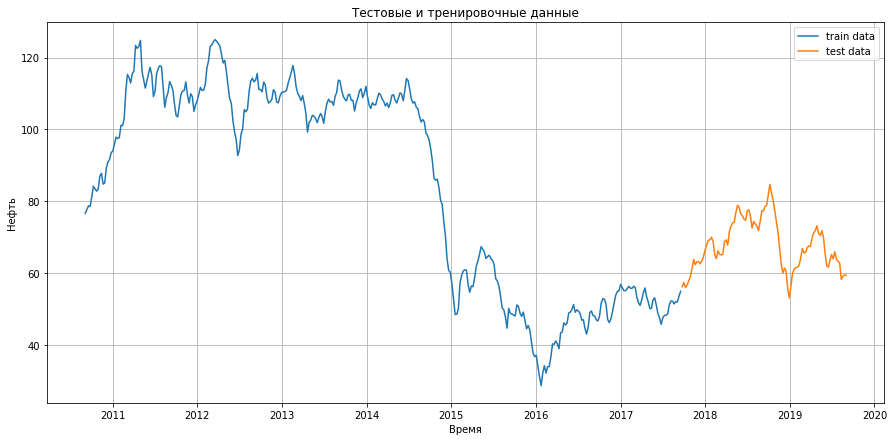

In [39]:
train, test = split_data( brent_data_w, -100)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.grid()
plt.legend()
plt.show()

In [40]:
h=1
target = brent_data_w['Значение'].values[h:].reshape((brent_data_w.shape[0]-h,1))
y = target
X = brent_data_w.values
y.shape

(460, 1)

In [41]:
X_train = X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [42]:
print(f'X_train_shape={X_train.shape}, y_train_shape={y_train.shape}, X_test_shape={X_test.shape}, y_test_shape={y_test.shape}')

X_train_shape=(361, 16), y_train_shape=(361,), X_test_shape=(100, 16), y_test_shape=(99,)


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [45]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [46]:
y_test_pred = model.predict(X_test)

Text(0.5, 1.0, 'Модель предсказывания первой точки от текущей h=1')

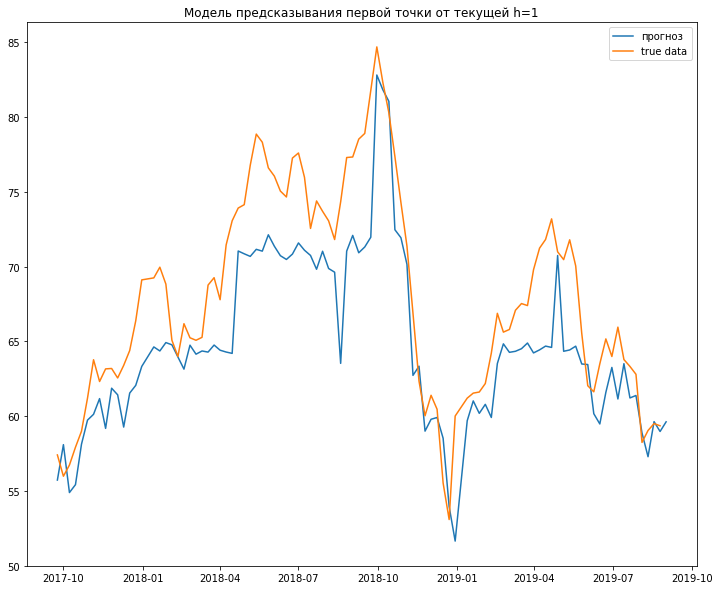

In [47]:
plt.figure(figsize=(12, 10))
plt.plot(test.index, y_test_pred, label='прогноз')
plt.plot(test.index[:-1], y_test, label='true data')
plt.legend()
plt.title('Модель предсказывания первой точки от текущей h=1')

Ошибка

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
y_test_pred.shape

(100,)

In [51]:
y_test.shape

(99,)

In [53]:
er_g = mean_absolute_percentage_error(y_true=y_test,y_pred = y_test_pred[99:])

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   12.255730209082989 %


5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

Сделаем прямое прогнозирование и сравним ошибки моделей

In [65]:
target = brent_data_w['Значение'].values.reshape((brent_data_w.shape[0],1))
y = target
X = brent_data_w.iloc[:,1:].values
y.shape

(461, 1)

In [66]:
X_train = X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [63]:
model2 = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [67]:
model2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [68]:
y_test_pred = model2.predict(X_test)

Text(0.5, 1.0, 'Модель прямого прогнозирования')

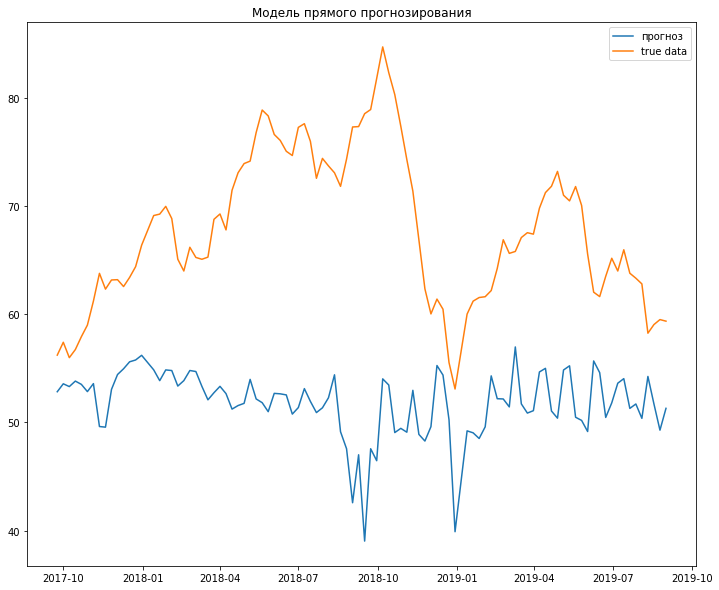

In [70]:
plt.figure(figsize=(12, 10))
plt.plot(test.index, y_test_pred, label='прогноз')
plt.plot(test.index, y_test, label='true data')
plt.legend()
plt.title('Модель прямого прогнозирования')

In [71]:
er_g = mean_absolute_percentage_error(y_true=y_test,y_pred = y_test_pred)

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   22.778940720827116 %


Вывод: прогноз на следующий день на 10 процентов точнее прямого прогноза на весь период